## Naive Bayes Classifier

In the context of Naive Bayes, the numerator in the formula represents the joint probability of observing the given evidence (features) and the target class. This can be interpreted as the likelihood of observing the evidence given the class, multiplied by the prior probability of the class.  

+ 𝑃(𝐸∣𝐶): This is the likelihood, which represents the probability of observing the evidence 𝐸 given that the class is 𝐶.

+ 𝑃(𝐶): This is the prior probability of the class 𝐶, representing how common the class is in the overall population.



The denominator in the formula normalizes the result so the probabilities add up to equal one.

In [4]:
import pandas as pd

# import data
df = pd.read_csv('../data/churn.txt', delimiter=',')

In [5]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


For the sake of this demonstration, we will only be using Int'l Plan and VMail Plan.

In [6]:
df2 = df[['Int\'l Plan', 'VMail Plan', 'Churn?']]
df2.head()

,Int'l Plan,VMail Plan,Churn?
0,no,yes,False.
1,no,yes,False.
2,no,no,False.
3,yes,no,False.
4,yes,no,False.


In [7]:
# rename columns
df2.rename(columns= 
           {'Int\'l Plan': 'International Plan',
            'VMail Plan': 'Voicemail Plan',
            'Churn?': 'Churn'}, inplace=True)

C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\848690299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns=


In [8]:
# view first 5 rows of data 
df2.head()

,International Plan,Voicemail Plan,Churn
0,no,yes,False.
1,no,yes,False.
2,no,no,False.
3,yes,no,False.
4,yes,no,False.


In [9]:
# map the text to numeric values
df2['Churn'] = df2['Churn'].map({'False.': 0, 'True.': 1})

C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\627089526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Churn'] = df2['Churn'].map({'False.': 0, 'True.': 1})


##### Calculate Prior Probability

Since our goal is to classify someone as churning or not churning, we need the prior probability of churning. This is just the prevalence of churning which is **0.1449**. We also need the compliment of this value which is the probability that they will not churn no matter what the predictor variables tell us. This value is **0.8551**. 

In [10]:
# churn value counts
df2['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [20]:
df2['International Plan'].value_counts()

International Plan
no     3010
yes     323
Name: count, dtype: int64

In [22]:
p_international_plan = 323 / 3333
p_international_plan

0.0969096909690969

In [24]:
df2['Voicemail Plan'].value_counts()

Voicemail Plan
no     2411
yes     922
Name: count, dtype: int64

In [25]:
p_voicemail_plan = 922 / 3333
p_voicemail_plan

0.27662766276627665

In [11]:
churn_total = sum(df2['Churn'] == 1)
churn_total

483

In [12]:
not_churn_total = sum(df2['Churn'] == 0)
not_churn_total

2850

In [13]:
# calculate probability of churning for entire dataset
churn_prior = round(483 / (3333), 4)
churn_prior

0.1449

In [14]:
# probability of not churning for entire dataset
not_churn_prior = 1 - churn_prior
not_churn_prior

0.8551

#### Conditional Probabilities for Churn

Now, we need to calculate a few conditional probabilities. Our dataset has two predictor variables **International Plan** and **Voicemail Plan**. The two conditional probabilities we need for naive bayes are the probability that someone has the international plan given they have churned and the probability that someone has the voicemail plan given they have churned.

probability of International Plan given Churn: 
+ p(I | C) = 0.2836

probability of Voicemail Plan given Churn:
+ p(V | C) = 0.1656

In [15]:
# probability of having international plan given churn
# p(I | C)
I_given_C = round((df2[(df2['International Plan'] == 'yes') & (df2['Churn'] == 1)].shape[0]) / churn_total, 4)
I_given_C

0.2836

In [16]:
print(f'The probability of International Plan given Churn is {I_given_C}.')

The probability of International Plan given Churn is 0.2836.


In [17]:
# probability of having voicemail plan given churn
# p(V | C)
V_given_C = round((df2[(df2['Voicemail Plan'] == 'yes') & (df2['Churn'] == 1)].shape[0]) / churn_total, 4)
V_given_C

0.1656

In [ ]:
# posterior probability score for both plans churning
churn_score_both_plans = round((I_given_C * V_given_C * churn_prior), 4)
churn_score_both_plans

0.0068

To create a score for a new customer with both plans not churning, we just use the conditional probability for each plan given they will not churn. The product of these two values are multiplied by the prior probability of not churning for the final score. The highest final score will be the classification for a customer with both plans.

The results tell us that this classifier will predict someone with both plans not to churn.

In [ ]:
# p(I | Not Churn)
I_given_not_C = round((df2[(df2['International Plan'] == 'yes') & (df2['Churn'] == 0)].shape[0]) / not_churn_total, 4)
I_given_not_C

0.0653

In [ ]:
# p(V | Not Churn)
V_given_not_C = round((df2[(df2['Voicemail Plan'] == 'yes') & (df2['Churn'] == 0)].shape[0]) / not_churn_total, 4)
V_given_not_C

0.2954

In [ ]:
#posterior probability score for not churning
not_churn_score_both_plans = round((I_given_not_C * V_given_not_C * not_churn_prior), 4)
not_churn_score_both_plans

0.0165

##### Scores for Not Having Either Plan

To find the conditional probabilities for not having the plans we can easily use their compliments.

In [46]:
# probability of no international plan given churn
# p(Not I | C)
not_I_given_C = round(1 - I_given_C, 4) 
not_I_given_C

0.7164

In [47]:
# probability of no voicemail plan given churn
not_V_given_C = round(1 - V_given_C, 4)
not_V_given_C

0.8344

In [75]:
# scores for no plan and churning
churn_score_no_plans = round((not_I_given_C * not_I_given_C * churn_prior), 4)
churn_score_no_plans

0.0744

In [86]:
# scores for no plan and no churn
not_churn_score_no_plans = round((not_I_given_C * not_V_given_C * not_churn_prior), 4)
not_churn_score_no_plans

0.5111

##### No International Plan, Yes Voicemail Plan

This customer is also classified as not churning.

+ p(Not I | C) * p(V | C) * p(C)
+ p(Not I | not C) * p(V | not C) * p(Not C)

In [ ]:
# no international plan and not churning probability
not_I_given_not_C = 1 - I_given_not_C
not_I_given_not_C

0.9347

In [79]:
# posterior probability churn score for only voicemail plan
churn_score_no_ip = round((not_I_given_C * V_given_C * churn_prior), 4)
churn_score_no_ip

0.0172

In [80]:
# posterior probability churn score for voicemail plan 
not_churn_score_no_ip = round((not_I_given_not_C * V_given_C * not_churn_prior), 4)
not_churn_score_no_ip

0.1324

##### Yes International Plan, No Voicemail Plan

For Churners:
+ p(I | C) * p(Not V |C) * p(C)

For Not Churners
+ p(I | Not C) * p(Not V | Not C) * p(Not C)

In [102]:
# probability of churning when having the international plan but no voicemail plan
churn_score_no_voicemail = round((I_given_C * not_V_given_C * churn_prior), 4)
churn_score_no_voicemail

0.0343

In [103]:
# probability of not churning when having the international plan but no voicemail plan
not_churn_score_no_voicemail = round((I_given_not_C * not_I_given_not_C * not_churn_prior), 4)
not_churn_score_no_voicemail

0.0522

Now that we have the basics down, we can easily implement this using scikit-learn.

In [55]:
from sklearn.naive_bayes import MultinomialNB


In [56]:
# create X y split
X = df2[['International Plan', 'Voicemail Plan']]
y = df2['Churn']

In [57]:
# change yes values to 1 and no values to 0
X['International Plan'] = X['International Plan'].map({'yes': 1, 'no': 0})
X['Voicemail Plan'] = X['Voicemail Plan'].map({'yes': 1, 'no': 0})

C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\3367389687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['International Plan'] = X['International Plan'].map({'yes': 1, 'no': 0})
C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\3367389687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Voicemail Plan'] = X['Voicemail Plan'].map({'yes': 1, 'no': 0})


In [58]:
# create model and fit to our data with no smoothing
model = MultinomialNB(alpha=0)
model.fit(X, y)

MultinomialNB(alpha=0)

In [81]:
# new customer with both plans 
both_plans = pd.DataFrame({
    'International Plan': 1,
    'Voicemail Plan': 1
}, index = [0])

The model has classified this customer as one that will not churn.

In [88]:
# predict the class label 
model.predict(both_plans)

array([0])

In [84]:
# new customer with neither plan 
no_plans = pd.DataFrame({
    'International Plan': 0,
    'Voicemail Plan': 0
}, index = [0])

The scikit-learn model has also predicted this customer will not churn. We can use **predict_proba** to see the posterior probabilities. The probabilities we see are normalized by taking the sum of the posterior probability scores and dividing each score by that sum.

In [85]:
# predicted class - 0 for not churn and 1 for churn
model.predict_proba(no_plans)

array([[0.85508551, 0.14491449]])

The model predicts no churn again.

In [89]:
# new customer with only international plan 
international_plan = pd.DataFrame({
    'International Plan': 1,
    'Voicemail Plan': 0
}, index = [0])

model.predict_proba(international_plan)

array([[0.62839799, 0.37160201]])

Since the model predicts no churn for this customer, our model will always predict that a customer will not churn since we have now gone over every possible new customer. 

In [90]:
# new customer only voicemail plan 
voicemail_plan = pd.DataFrame({
    'International Plan': 0,
    'Voicemail Plan': 1
}, index = [0])

model.predict_proba(voicemail_plan)

array([[0.92912582, 0.07087418]])

Although our model is not very helpful since every customer will be predicted not to churn, we can use the posterior odds ratio to determine the strength of evidence for each classification. This measure of strength of evidence in favor of a particular classification is called the **posterior odds ratio** and is calculated as the probability of class 1 given the evidence * the probability of that class, divided by the probability of class 2 given the evidence * the probability of the other class.

##### Posterior Odds for Both Plans

We can find the posterior odds ratio by dividing the class probabilities. We do this to compare the likelihood of each class. For example, if class 1 has a posterior probability (which is the probability of that class determined by the model) of 0.6 and class 2 posterior probability of 0.4, we can quickly say that C1 is 20% more likely but we do not keep proportionality. This is apparent when C1 has a posterior probability of 0.2 compared to 0.1. If we just compare these probabilities we get a difference of 0.1, or 10% more likely but the posterior odds ratio is 2 meaning it is twice as likely. This is especially important when the probabilites are close to 0 or 1.

If a value is less than 1 it means that the denominator is the more likely class. In this example, not churning is the class in the denominator. The value of .41 is the odds of churning vs not churning. If we want to get the odds for a customer that is churning we just use 1/0.4126 and it tells us the odds of this customer not churning is roughly 2.5 times higher as that customer churning.

Advantages of using Posterior Odds Ratio:
+ see why the model predicted a given class
+ see how different features effect the predicted class
+ adjust decision thresholds
+ knowing the odds helps explainability since the scores for a class are the probabilites of the class and the posterior odds ratio is the odds of the class. 


In [97]:
# posterior odds for both plans
posterior_odds_both_plans = round((churn_score_both_plans) / (not_churn_score_both_plans), 2)
posterior_odds_both_plans

0.41

In [99]:
# posterior odds for no plans
posterior_odds_no_plans = round(churn_score_no_plans / not_churn_score_no_plans, 2)
posterior_odds_no_plans

0.15

In [104]:
# posterior odds for only international plan
posterior_odds_ip = round(churn_score_no_voicemail / not_churn_score_no_voicemail, 2)
posterior_odds_ip

0.66

In [105]:
# posterior odds for only voicemail plan
posterior_odds_voicemail = round(churn_score_no_ip / not_churn_score_no_ip, 2)
posterior_odds_voicemail


0.13

From the information above we see that the odds of churning are always less than not churning but they are increased with the international plan. We saw from conditional probabilities that the probability of churning was higher for those with the international plan but the posterior odds ratio gives us a more comparative figure. For example, 28% of customers that churned had the international plan. But the posterior odds ratio tells us how much more likely they are to churn or not instead of just a percentage of churners had the international plan. 

##### Balancing the Data

For data such as this with imbalanced classes, we have the option to balance the data.

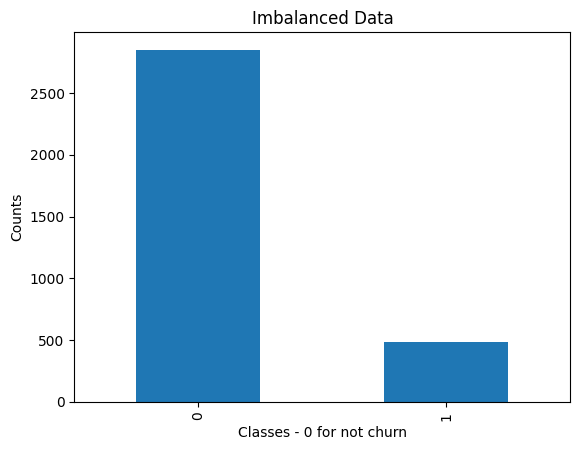

In [70]:
import matplotlib.pyplot as plt

churn = df2['Churn'].value_counts()
churn.plot(kind='bar')
plt.title('Imbalanced Data')
plt.ylabel('Counts')
plt.xlabel('Classes - 0 for not churn')
plt.show()

One way to balance the data is to take all churners but sample only 50% of non churners. The first thing to do is accept all observations where churn = 1 so we will do that first. This dataframe should have a length of 483 records.

In [107]:
churn_df = df2[df2['Churn'] == 1]
len(churn_df)

483

The next step is to take a random sample of 50% of non churners. Since the data started with 2850 non churners, we would have 1425.

In [109]:
non_churn = df2[df2['Churn'] == 0]
non_churn = non_churn.sample(frac=0.5, random_state=42)
len(non_churn)

1425

Now we can combine the two dataframes.

In [110]:
# this is the balanced data set
balanced_data = pd.concat([churn_df, non_churn], ignore_index=True)
balanced_data = balanced_data.sample(frac=1, random_state=42)
balanced_data

,International Plan,Voicemail Plan,Churn
1424,no,no,0
111,no,no,1
1841,no,yes,0
968,no,yes,0
415,no,no,1
...,...,...,...
1130,no,no,0
1294,no,yes,0
860,no,yes,0
1459,no,yes,0


In [ ]:
# this data is more balanced
balanced_data['Churn'].value_counts(normalize=True)

Churn
0    0.746855
1    0.253145
Name: proportion, dtype: float64

Let's see if we get different results from this dataset for churn and not churn. From the results, we see that the model has now predicted a customer with only the international plan to churn. 

In [113]:
# map values for model creation
balanced_data['International Plan'] = balanced_data['International Plan'].map({'yes': 1, 'no': 0})
balanced_data['Voicemail Plan'] = balanced_data['Voicemail Plan'].map({'yes': 1, 'no': 0})
balanced_data

,International Plan,Voicemail Plan,Churn
1424,0,0,0
111,0,0,1
1841,0,1,0
968,0,1,0
415,0,0,1
...,...,...,...
1130,0,0,0
1294,0,1,0
860,0,1,0
1459,0,1,0


In [120]:
# create X and y
X_bal = balanced_data.drop(columns='Churn', axis=1)
y_bal = balanced_data['Churn']

# build model
balanced_model = MultinomialNB(alpha=0)
balanced_model.fit(X_bal, y_bal)

MultinomialNB(alpha=0)

In [136]:
# make predictions
balanced_model.predict(both_plans)

array([0])

In [137]:
balanced_model.predict(no_plans)

array([0])

In [138]:
balanced_model.predict(international_plan)

array([1])

In [139]:
balanced_model.predict(voicemail_plan)

array([0])

##### Log Posterior Odds Ratio

In the log posterior odds ratio each term related to the additive contribution (pos or neg) of each attribute. For example, we can examine a customer who belongs to both plans.

To get the values we need the **Feature log probabilities**. This is the log of the 

In [ ]:
# these are the feature log probabilities of each feature and each class
# the more negative the number, the less likely
feature_log_probs = balanced_model.feature_log_prob_
feature_log_probs

array([[-1.78424064, -0.18383213],
       [-0.45991643, -0.99787072]])

In [ ]:
# create dataframe of these feature log probabilities 
feature_contributions = pd.DataFrame(feature_log_probs.T, index=X.columns, columns=model.classes_)

In [155]:
feature_contributions

,0,1
International Plan,-1.784241,-0.459916
Voicemail Plan,-0.183832,-0.997871


For international plan, we get a positive number which indicates that class 1 is more likely. 
Subtracting the log probabilities is mathematically equivalent to dividing the original probabilities because of the properties of logarithms. We can do the same calculation for voicemail plan.

In [ ]:
# positive number means class 1 (churn) is more likely
log_odds_ip = feature_contributions.loc["International Plan", 1] - feature_contributions.loc["International Plan", 0] 
print(f"Log Posterior Odds Ratio for 'International Plan': {log_odds_ip}")

Log Posterior Odds Ratio for 'love': 1.3243242091016931


The negative number for voicemail plan tells us that they decrease the churn probability.

In [160]:
log_odds_v = feature_contributions.loc["Voicemail Plan", 1] - feature_contributions.loc["Voicemail Plan", 0] 
print(f"Log Posterior Odds Ratio for 'International Plan': {log_odds_v}")

Log Posterior Odds Ratio for 'International Plan': -0.8140385877672571


### Numeric Predictors for Naive Bayes Classification

To use a Naive Bayes Classifier with continuous predictive variables we use **Gaussian Bayes**. The first step is to create normal (gaussian) curves for each feature in the training data. For example, let's use the predictor *Total Minutes* from the original data frame. To do this, we first calculate the mean total minutes for churners and standard deviation for churners then we calculate the mean total minutes for non churners and the standard deviation for non churners.

In [162]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [171]:
# create column for total minutes
df['total_minutes'] = df['Day Mins'] + df['Eve Mins']

In [172]:
# create data frame of total minutes, and churn
df_total_mins = df[['total_minutes', 'Churn?']]

In [173]:
df_total_mins.rename(columns= {'Churn?': 'Churn'}, inplace=True)
df_total_mins.columns

C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\2723713009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_mins.rename(columns= {'Churn?': 'Churn'}, inplace=True)


Index(['total_minutes', 'Churn'], dtype='object')

In [174]:
df_total_mins

,total_minutes,Churn
0,462.5,False.
1,357.1,False.
2,364.6,False.
3,361.3,False.
4,315.0,False.
...,...,...
3328,371.7,False.
3329,384.5,False.
3330,469.6,False.
3331,373.4,False.


In [175]:
df_total_mins['Churn'] = df_total_mins['Churn'].map({'True.': 1, 'False.': 0})

C:\Users\ryans\AppData\Local\Temp\ipykernel_18812\2609008717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_mins['Churn'] = df_total_mins['Churn'].map({'True.': 1, 'False.': 0})


In [176]:
df_total_mins

,total_minutes,Churn
0,462.5,0
1,357.1,0
2,364.6,0
3,361.3,0
4,315.0,0
...,...,...
3328,371.7,0
3329,384.5,0
3330,469.6,0
3331,373.4,0


In [178]:
total_mins_churn = df_total_mins[df_total_mins['Churn'] == 1]
total_mins_churn_mean = total_mins_churn['total_minutes'].mean()
total_mins_churn_sd = total_mins_churn['total_minutes'].std()

In [189]:
print(f'The mean total minutes for the churners group is {round(total_mins_churn_mean, 3)}\nand the standard deviation is {round(total_mins_churn_sd, 3)}')

The mean total minutes for the churners group is 419.324
and the standard deviation is 95.587


In [191]:
total_mins_not_churn = df_total_mins[df_total_mins['Churn'] == 0]
total_mins_not_churn_mean = total_mins_not_churn['total_minutes'].mean()
total_mins_not_churn_sd = total_mins_not_churn['total_minutes'].std()

In [192]:
print(f'The mean total minutes for the non-churners group is {round(total_mins_not_churn_mean, 3)}\nand the standard deviation is {round(total_mins_not_churn_sd, 3)}')

The mean total minutes for the non-churners group is 374.219
and the standard deviation is 68.428
